In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()
os.chdir(r'C:\Users\omkar reddy\Desktop\Pynb')

In [34]:
df=pd.read_csv('haberman.csv')
df.shape  #Finding out the size of data to deal with

(306, 4)

In [35]:
df.head() #Having a look at some sample data. 

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

Data has 4 features
1. Age of the Patient
2. Year of the operation
3. Number of positive axillary nodes detected
4. Status of the patient(1 patients who survived >=5 years, 2 patients who survived <5 years)

In [7]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

The data has 2 classes -- 
225 patients survived for 5 year or more, 81 patients survived for less than 5 years.


In [36]:
list(df['status'].unique())

[1, 2]

In [37]:
df['status']= df['status'].astype('category')

Converted the status feature to category, which previously were integers.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


Statistics

In [47]:
df.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


From the above descriptive statistics we can observe that more than 75% of the data has node value of less than 4. 

Plotting Scatter plot nodes vs age

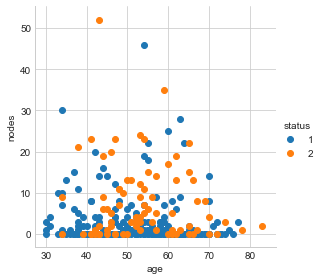

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',size=4)\
    .map(plt.scatter, 'age', 'nodes')\
    .add_legend()
plt.show()

All the possible pair plots for the data

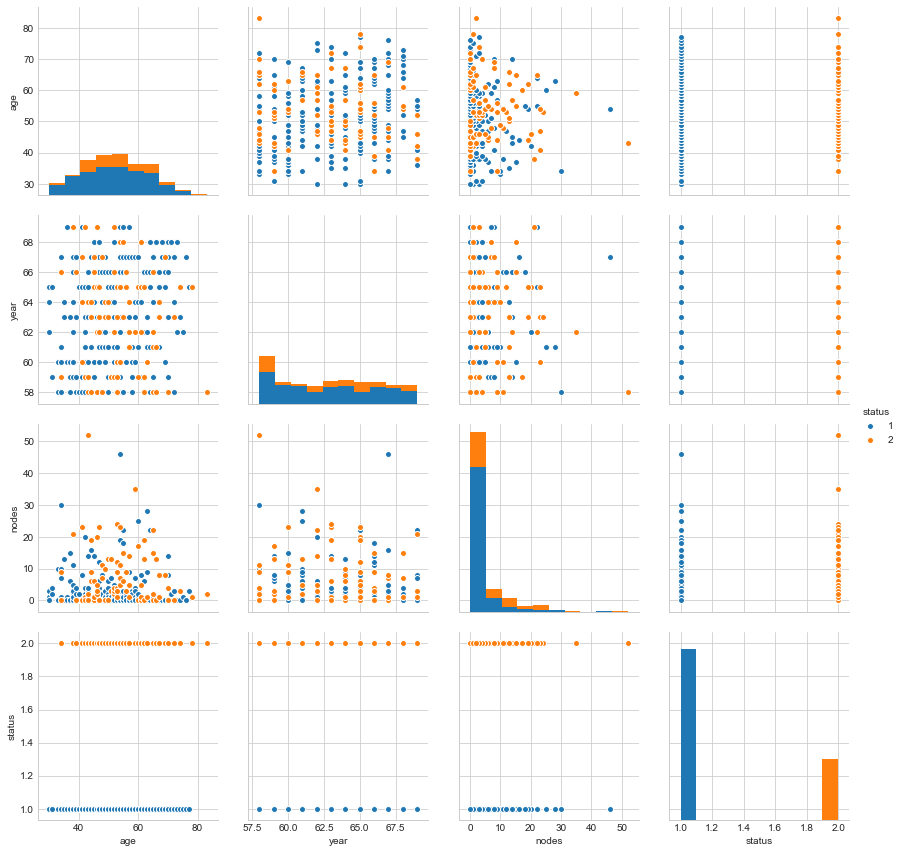

In [20]:
sns.set_style('whitegrid')
sns.pairplot(df,hue ='status',size=3)
plt.show()

Most of the plots are cluttered and no real conclusion can be drawn, hence should go for the univariate analysis.

Univariate Analysis: Examining each feature.

C:\Users\omkar reddy\Anaconda3-1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\omkar reddy\Anaconda3-1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


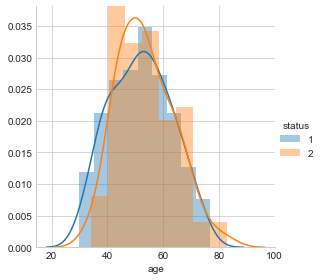

In [44]:
#univariate analysis
sns.FacetGrid(df,hue='status',size=4)\
    .map(sns.distplot,'age')\
    .add_legend()
plt.show()

C:\Users\omkar reddy\Anaconda3-1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\omkar reddy\Anaconda3-1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


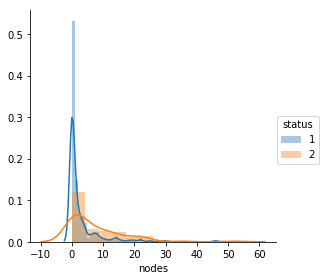

In [9]:
sns.FacetGrid(df,hue='status',size=4)\
    .map(sns.distplot,'nodes')\
    .add_legend()
plt.show()

Plotting PDF and CDF

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


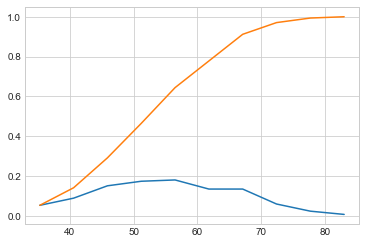

In [45]:
#Plotting PDF & CDF
count, bin_ed = np.histogram(df['age'], bins=10, 
                                 density = True)
pdf=count/sum(count)
print(pdf)
cdf=np.cumsum(pdf)
print(cdf)
plt.plot(bin_ed[1:],pdf)
plt.plot(bin_ed[1:],cdf)
plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


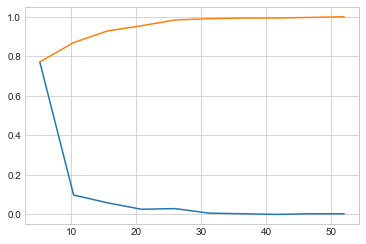

In [46]:
count, bin_ed = np.histogram(df['nodes'], bins=10, 
                                 density = True)
pdf=count/sum(count)
print(pdf)
cdf=np.cumsum(pdf)
print(cdf)
plt.plot(bin_ed[1:],pdf)
plt.plot(bin_ed[1:],cdf)
plt.show()

Box plots

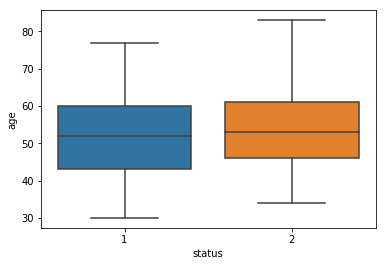

In [10]:
sns.boxplot(x='status', y='age',data=df)

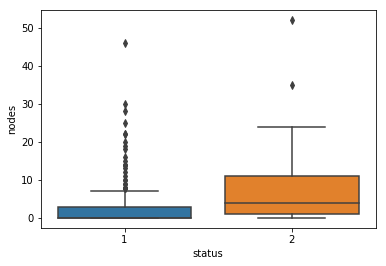

In [11]:
sns.boxplot(x='status',y='nodes',data=df)

Violin Plots

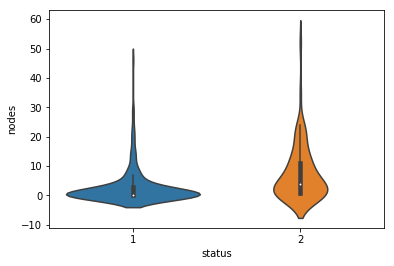

In [14]:
sns.violinplot(x='status',y='nodes',data=df)

Observations:


1.Around 78% of the patients have a positive axilliary node value of 5 or less.


2. Considering the general distribution of data through Box and Violin plots we can see that people who survived after 5 year tend to have more node values of less than 10. 